In [44]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
import time
import pickle

print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('matplotlib : {}'.format(matplotlib.__version__))
print('Seaborn : {}'.format(seaborn.__version__))
print('Scipy : {}'.format(scipy.__version__))
print('Sklearn : {}'.format(sklearn.__version__))



Python : 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy : 1.14.3
Pandas : 0.23.0
matplotlib : 2.2.2
Seaborn : 0.8.1
Scipy : 1.1.0
Sklearn : 0.19.1


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

In [46]:
tic=time.time()
full_data=pd.read_csv("creditcard.csv")




In [47]:
print(full_data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [48]:
print(full_data.shape)

(284807, 31)


In [73]:
#number of fraud deyected 
#number of valid cases detected 

Fraud = full_data[full_data['Class'] == 1]
Valid = full_data[full_data['Class'] == 0]
Outlier_fraction = len(Fraud)/float(len(Valid))

print(Outlier_fraction)
print('Fraud Cases : {}' .format(len(Fraud)))   
print('Valid Cases : {}'.format(len(Valid)))


0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


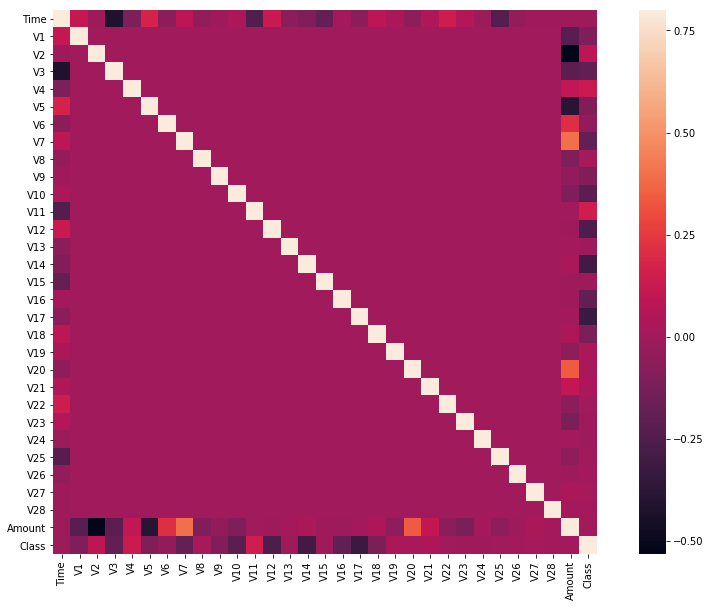

In [49]:
#creating the correlational matrix 

corrmat = full_data.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(corrmat , vmax = .8 , square = True)
plt.show()


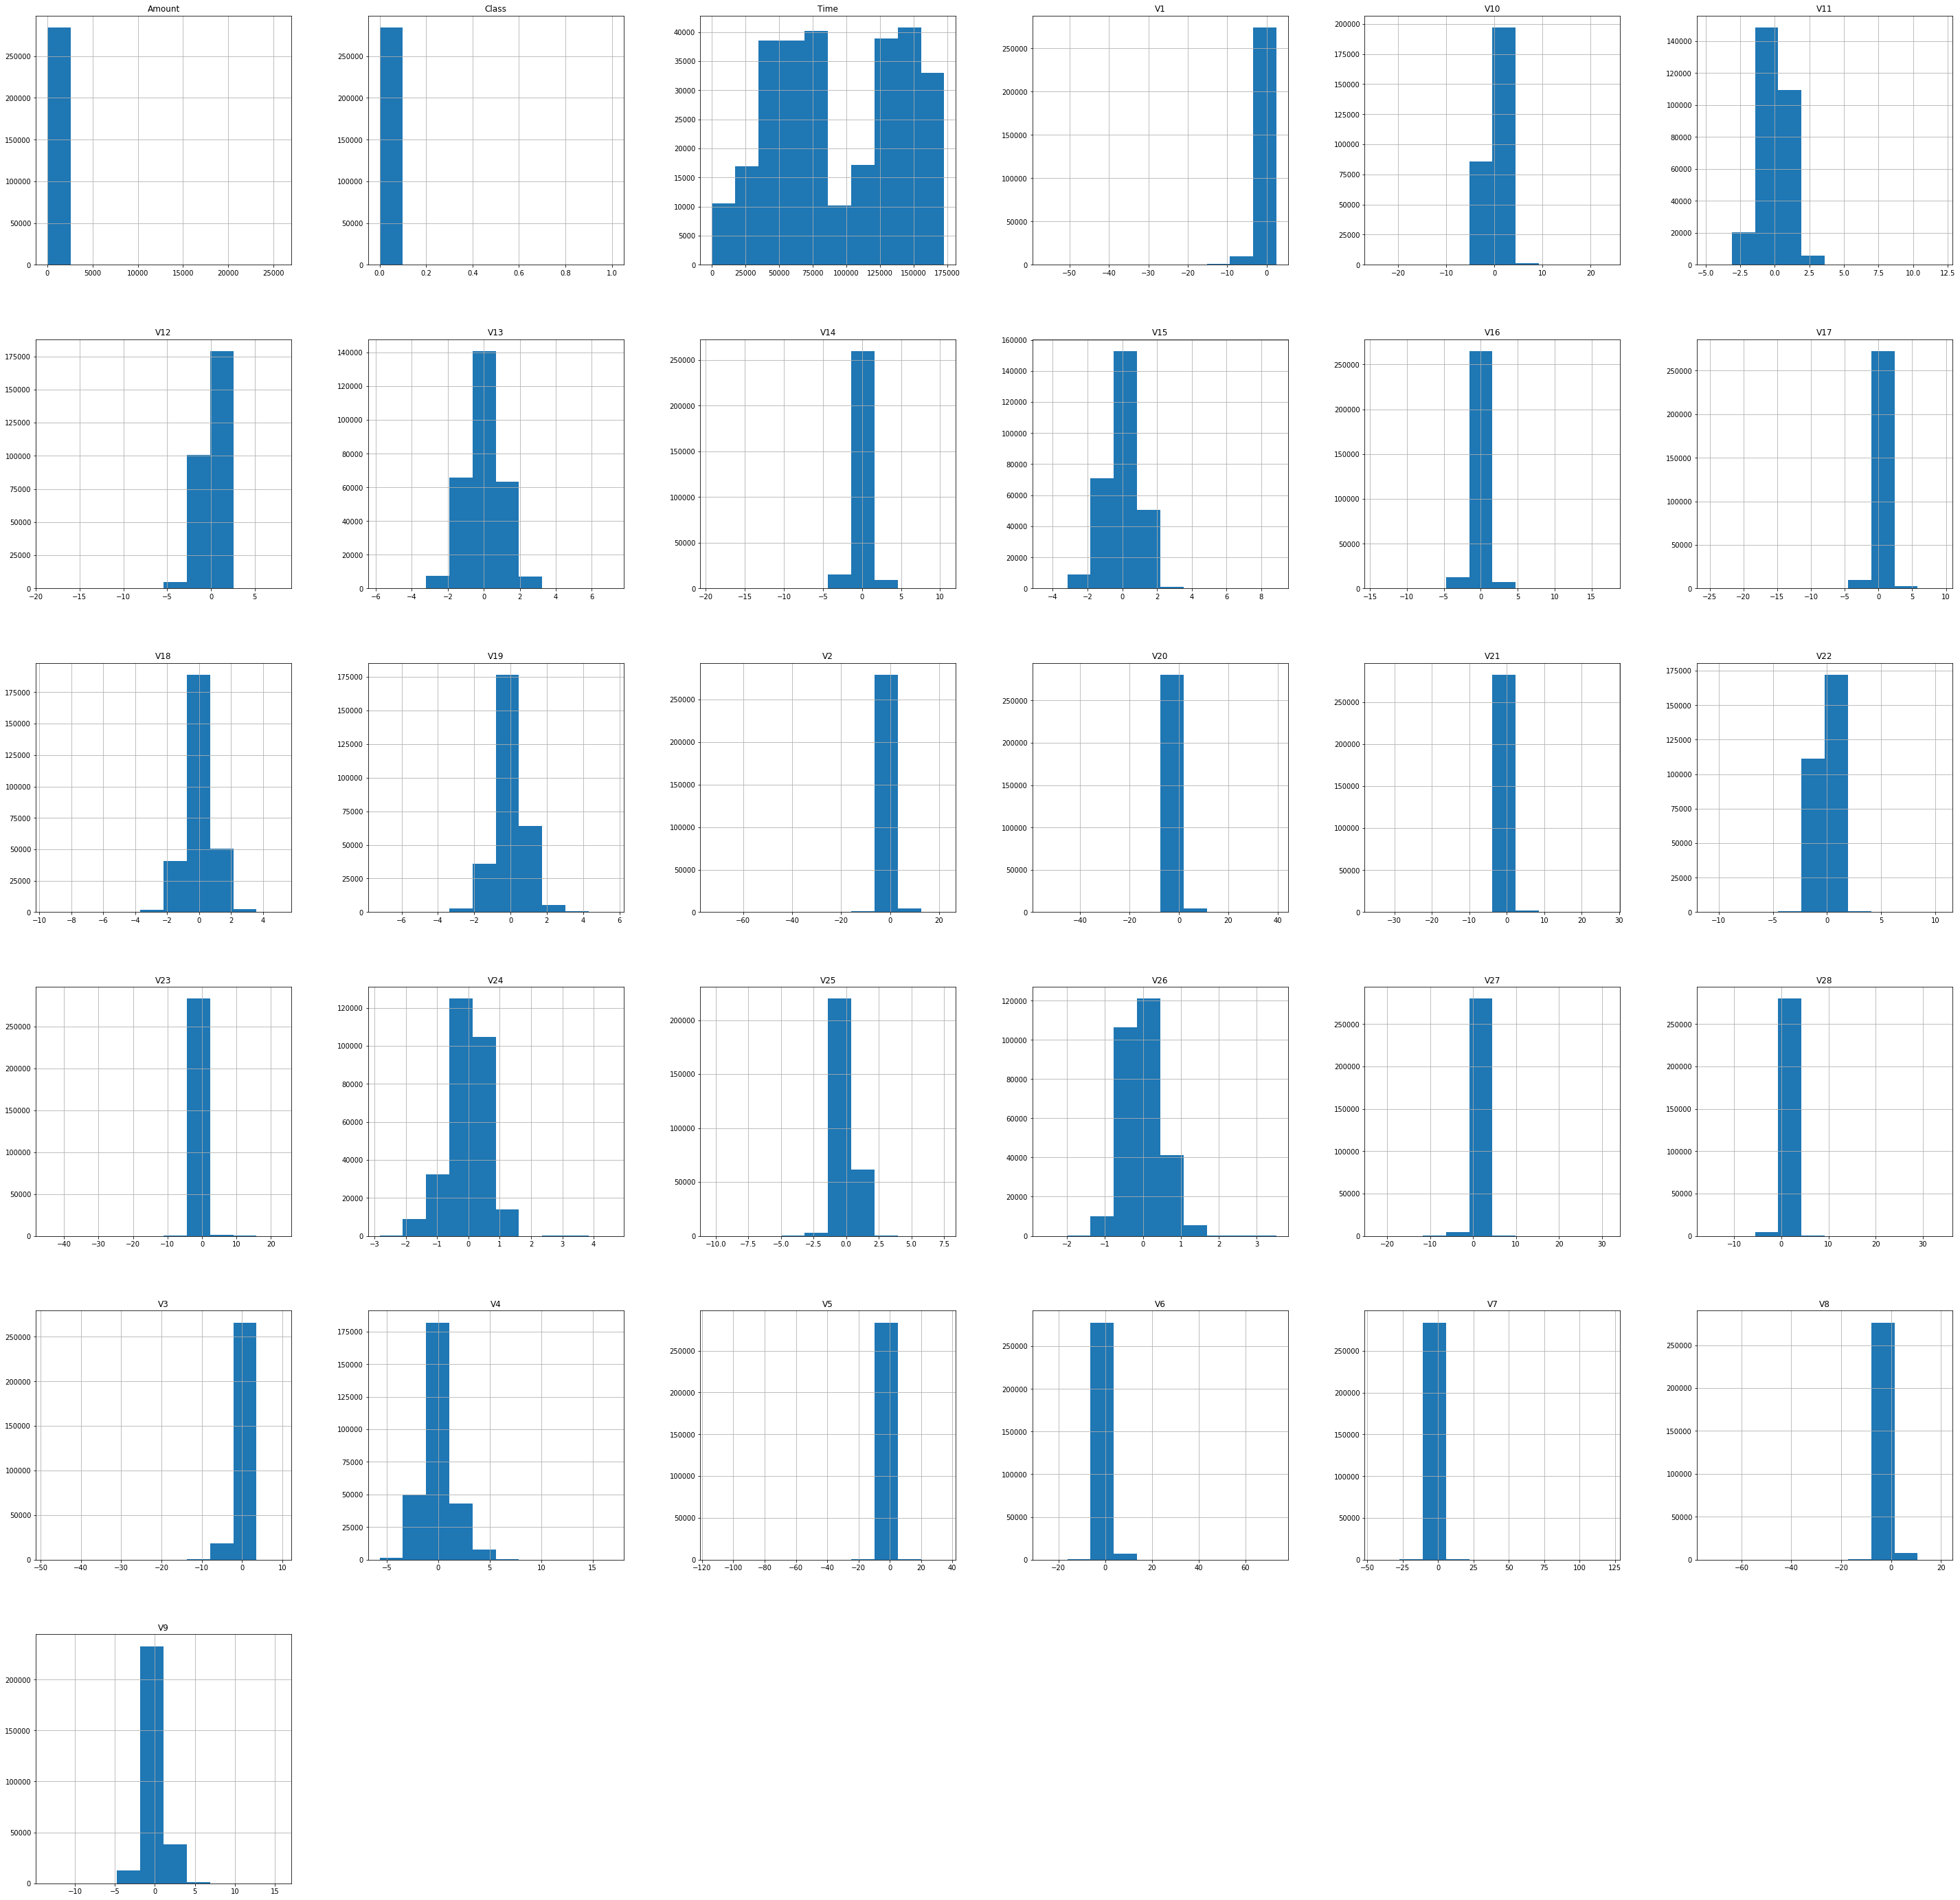

In [50]:
#plot hisograms for each parameter

full_data.hist(figsize = (50,50))
plt.show()

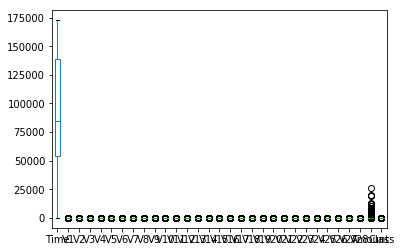

In [51]:
full_data.plot.box()
plt.show()

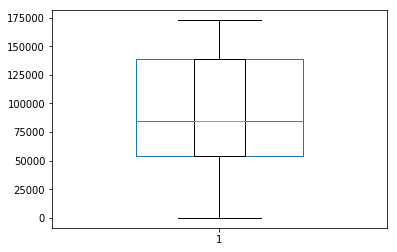

In [52]:
full_data.plot.box()
plt.boxplot(full_data['Time'])
plt.show()

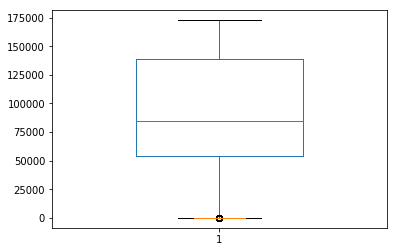

In [53]:
full_data.plot.box()
plt.boxplot(full_data['Class'])
plt.show()

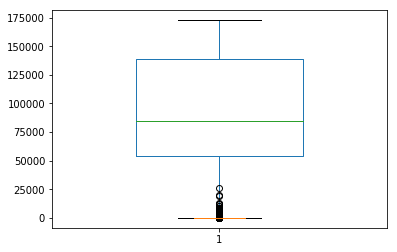

In [54]:
full_data.plot.box()
plt.boxplot(full_data['Amount'])
plt.show()

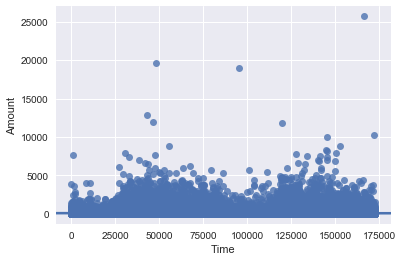

In [70]:
sns.set(color_codes=True)
sns.regplot(x="Time", y="Amount", data=full_data);

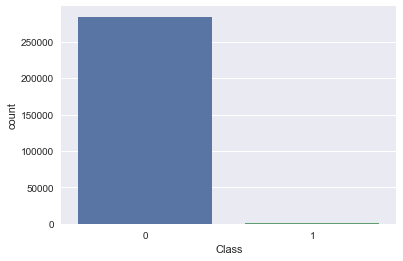

In [72]:
sns.countplot(full_data['Class'])

In [55]:
full_data=full_data.sample(frac=1)#randomize the whole dataset
print(full_data.columns)
print(full_data.shape)

full_features=full_data.drop(["Time","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
print(full_labels)

full_features_array=full_features.values
full_labels_array=full_labels.values


train_features,test_features,train_labels,test_labels = train_test_split(full_features_array, full_labels_array, train_size=0.90)
train_features = normalize(train_features)
test_features = normalize(test_features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
        Class
108802      0
237851      0
160938      0
248633      0
212746      0
100788      0
188192      0
61712       0
235748      0
189635      0
18848       0
81005       0
117620      0
168869      0
87015       0
284483      0
55627       0
24327       0
100950      0
147732      0
129046      0
283183      0
34086       0
49500       0
221903      0
85234       0
124606      0
279342      0
173384      0
106940      0
...       ...
57231       0
63542       0
136929      0
4053        0
72155       0
155379      0
114093      0
217139      0
150834      0
197311      0
277156      0
31478       0
146580      0
262779      0
66254       0
221682      0
4288        0
32512       0
231867      0
251847  

C:\Users\chauh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
#k_means_classification --> k_means_clustering, confsion_matrix, reassigning
kmeans=KMeans(n_clusters=2, random_state=0, algorithm="elkan", max_iter=10000, n_jobs=-1)
kmeans.fit(train_features)
kmeans_predicted_train_labels = kmeans.predict(train_features)


In [57]:
#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives


In [58]:
tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False
if tn+tp<fn+fp:
    
	# clustering is opposite of original classification
	reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(test_features)

if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels
    
#calculating confusion matrix for kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()


#scoring kmeans
kmeans_accuracy_score = accuracy_score(test_labels, kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels, kmeans_predicted_test_labels)
kmeans_recall_score = recall_score(test_labels, kmeans_predicted_test_labels)
kmeans_f1_score = f1_score(test_labels, kmeans_predicted_test_labels)


#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)


K-Means
Confusion Matrix
tn = 22591 fp = 5831
fn = 27 tp = 32
Scores
Accuracy --> 0.7943190196973421
Precison --> 0.005457956677468873
Recall --> 0.5423728813559322
F1 --> 0.010807159743329957


In [59]:
#k_nearest_neighbours_classification

knn = KNeighborsClassifier(n_neighbors = 5, algorithm = "kd_tree", n_jobs = -1)
knn.fit(train_features, train_labels.ravel())
knn_predicted_test_labels = knn.predict(test_features)


#calculating confusion matrix for knn
tn,fp,fn,tp = confusion_matrix(test_labels,knn_predicted_test_labels).ravel()


#scoring knn
knn_accuracy_score = accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score = precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score = recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score = f1_score(test_labels,knn_predicted_test_labels)

In [60]:
#printing
print("")
print("K-Nearest Neighbours")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score*100)
print("Precison -->",knn_precison_score*100)
print("Recall -->",knn_recall_score*100)
print("F1 -->",knn_f1_score*100)


K-Nearest Neighbours
Confusion Matrix
tn = 28419 fp = 3
fn = 15 tp = 44
Scores
Accuracy --> 99.9367999719111
Precison --> 93.61702127659575
Recall --> 74.57627118644068
F1 --> 83.01886792452831


In [61]:
#time elapsed
toc=time.time()
elapsedtime = toc-tic
print("")
print("Time Taken : "+str(elapsedtime)+" seconds")


Time Taken : 52.16296100616455 seconds


In [62]:
# save the model to disk

with open('final_KNN_model.pkl', 'wb') as model_file:
            pickle.dump(knn, model_file)
        

In [63]:
# load the model from disk

with open('final_KNN_model.pkl', 'wb') as model_file:
            pickle.dump(knn, model_file)
        